In [28]:
# K-means
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 0)

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D

In [29]:
df_with_audio_features = pd.read_csv('larger_playlist.csv')
df_with_audio_features

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,...Ready For It?,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,0,0.615,0.779,2.0,-6.454,1.0,0.1350,0.06650,0.000000,0.1550,0.453,160.000,audio_features,7zgqtptZvhf8GEmdsM2vp2,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198.0,4.0
1,Life Changes,Thomas Rhett,4Vxu50qVrQcycjRyJQaZLC,59,0.687,0.845,7.0,-4.370,1.0,0.0575,0.10000,0.000000,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227.0,4.0
2,24K Magic,Bruno Mars,6b8Be6ljOzmkOmFslEb23P,81,0.818,0.803,1.0,-4.282,1.0,0.0797,0.03400,0.000000,0.1530,0.632,106.970,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983.0,4.0
3,Galway Girl,Ed Sheeran,0afhq8XCExXpqazXczTSve,78,0.624,0.876,9.0,-3.374,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827.0,4.0
4,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,83,0.614,0.379,4.0,-10.480,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,Fool's Overture,Supertramp,5pSSEkT0963muzzIjsVkrs,51,0.406,0.306,3.0,-10.482,1.0,0.0372,0.31300,0.007900,0.0727,0.073,135.272,audio_features,5pSSEkT0963muzzIjsVkrs,spotify:track:5pSSEkT0963muzzIjsVkrs,https://api.spotify.com/v1/tracks/5pSSEkT0963m...,https://api.spotify.com/v1/audio-analysis/5pSS...,652560.0,4.0
12132,Heart of the Sunrise - 2003 Remaster,Yes,7gC6Rbllqf1yXNC02e5jz2,44,0.362,0.507,1.0,-11.229,1.0,0.0394,0.01740,0.216000,0.1130,0.456,146.641,audio_features,7gC6Rbllqf1yXNC02e5jz2,spotify:track:7gC6Rbllqf1yXNC02e5jz2,https://api.spotify.com/v1/tracks/7gC6Rbllqf1y...,https://api.spotify.com/v1/audio-analysis/7gC6...,634440.0,3.0
12133,Venus And Mars / Rock Show / Jet - Live / Rema...,Paul McCartney,6Ff77WXC58MkhLE5A1qgY1,0,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747.0,4.0
12134,Venus And Mars / Rock Show / Jet - Live / Rema...,Wings,6Ff77WXC58MkhLE5A1qgY1,0,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747.0,4.0


# Clustering

In [30]:
# import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Here, we're selecting only the numerical columns
numerical_columns = df_with_audio_features.select_dtypes(include=['float64', 'int64'])
numerical_columns.isnull().sum()

scaler = StandardScaler()
X_prep = scaler.fit_transform(numerical_columns)

numerical_columns

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.615,0.779,2.0,-6.454,1.0,0.1350,0.06650,0.000000,0.1550,0.453,160.000,208198.0,4.0
1,59,0.687,0.845,7.0,-4.370,1.0,0.0575,0.10000,0.000000,0.0452,0.809,87.972,190227.0,4.0
2,81,0.818,0.803,1.0,-4.282,1.0,0.0797,0.03400,0.000000,0.1530,0.632,106.970,225983.0,4.0
3,78,0.624,0.876,9.0,-3.374,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,170827.0,4.0
4,83,0.614,0.379,4.0,-10.480,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,258987.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,51,0.406,0.306,3.0,-10.482,1.0,0.0372,0.31300,0.007900,0.0727,0.073,135.272,652560.0,4.0
12132,44,0.362,0.507,1.0,-11.229,1.0,0.0394,0.01740,0.216000,0.1130,0.456,146.641,634440.0,3.0
12133,0,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,620747.0,4.0
12134,0,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,620747.0,4.0


# KMeans

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

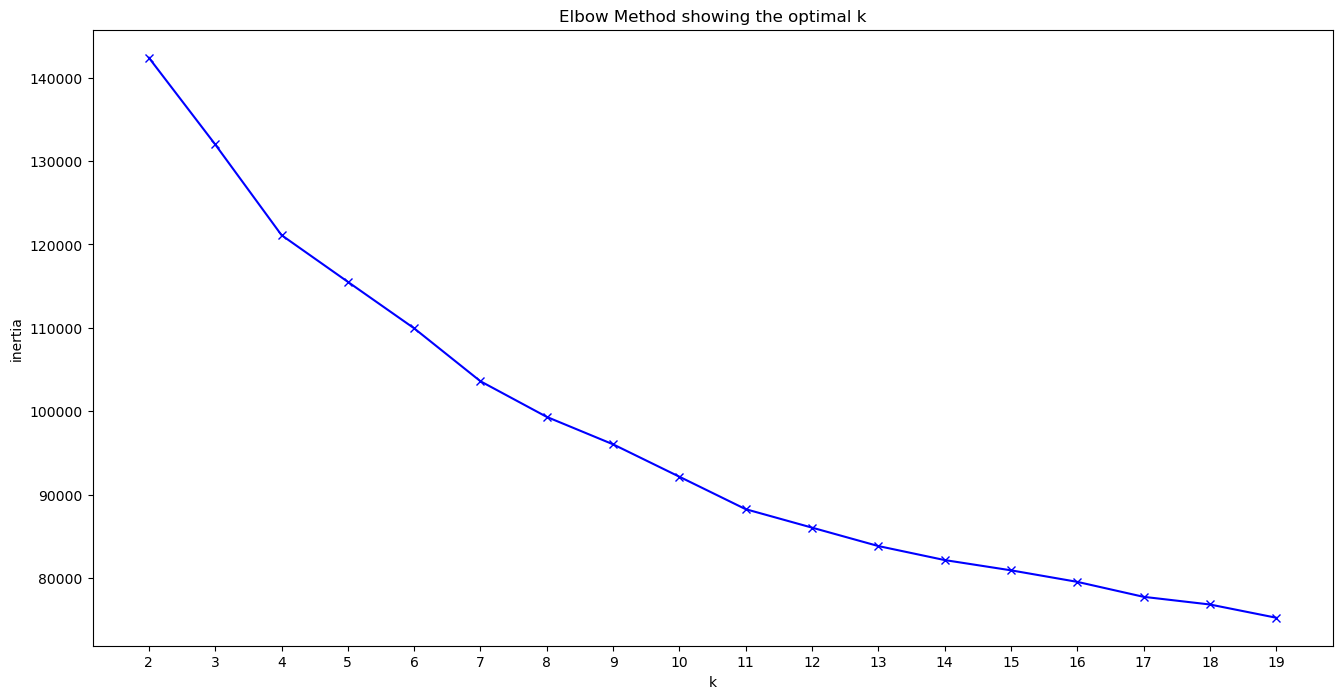

In [31]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# Silhoutte Score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

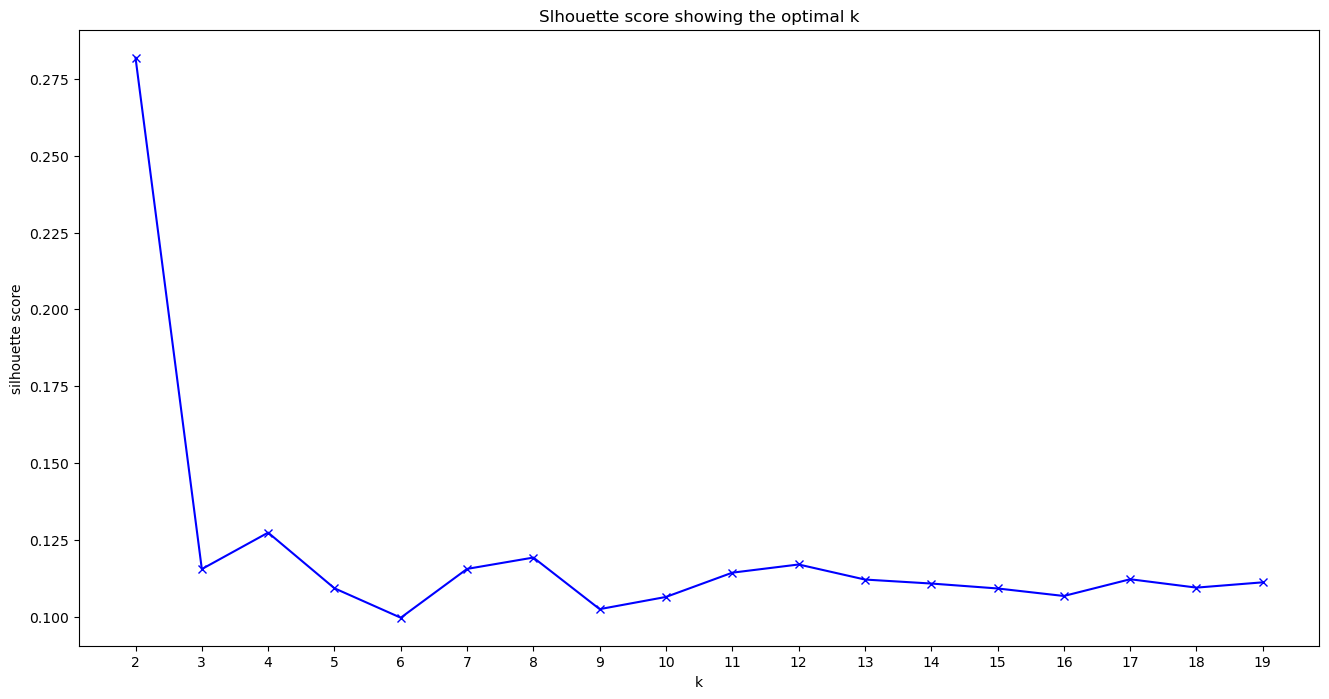

In [32]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

# 
Given that we have 12,136 songs, dividing them into just two clusters wouldn't be appropriate. After analyzing the data, it seems that the optimal number of clusters is 8. Therefore, I've chosen 8 clusters as the most suitable grouping for our songs.


# Assigning the cluster label

In [33]:
kmeans = KMeans(n_clusters=8, n_init=10, random_state=1234)
kmeans.fit(X_prep)

# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     506
1    3544
2    1684
3     667
4    2822
5      98
6    2117
7     698
Name: count, dtype: int64

#
Adding a new column having the cluster numbers to our original dataframe

In [34]:
df_with_audio_features['cluster'] = clusters.tolist()
df_with_audio_features

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,...Ready For It?,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,0,0.615,0.779,2.0,-6.454,1.0,0.1350,0.06650,0.000000,0.1550,0.453,160.000,audio_features,7zgqtptZvhf8GEmdsM2vp2,spotify:track:7zgqtptZvhf8GEmdsM2vp2,https://api.spotify.com/v1/tracks/7zgqtptZvhf8...,https://api.spotify.com/v1/audio-analysis/7zgq...,208198.0,4.0,6
1,Life Changes,Thomas Rhett,4Vxu50qVrQcycjRyJQaZLC,59,0.687,0.845,7.0,-4.370,1.0,0.0575,0.10000,0.000000,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227.0,4.0,1
2,24K Magic,Bruno Mars,6b8Be6ljOzmkOmFslEb23P,81,0.818,0.803,1.0,-4.282,1.0,0.0797,0.03400,0.000000,0.1530,0.632,106.970,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983.0,4.0,1
3,Galway Girl,Ed Sheeran,0afhq8XCExXpqazXczTSve,78,0.624,0.876,9.0,-3.374,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827.0,4.0,1
4,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,83,0.614,0.379,4.0,-10.480,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,Fool's Overture,Supertramp,5pSSEkT0963muzzIjsVkrs,51,0.406,0.306,3.0,-10.482,1.0,0.0372,0.31300,0.007900,0.0727,0.073,135.272,audio_features,5pSSEkT0963muzzIjsVkrs,spotify:track:5pSSEkT0963muzzIjsVkrs,https://api.spotify.com/v1/tracks/5pSSEkT0963m...,https://api.spotify.com/v1/audio-analysis/5pSS...,652560.0,4.0,2
12132,Heart of the Sunrise - 2003 Remaster,Yes,7gC6Rbllqf1yXNC02e5jz2,44,0.362,0.507,1.0,-11.229,1.0,0.0394,0.01740,0.216000,0.1130,0.456,146.641,audio_features,7gC6Rbllqf1yXNC02e5jz2,spotify:track:7gC6Rbllqf1yXNC02e5jz2,https://api.spotify.com/v1/tracks/7gC6Rbllqf1y...,https://api.spotify.com/v1/audio-analysis/7gC6...,634440.0,3.0,0
12133,Venus And Mars / Rock Show / Jet - Live / Rema...,Paul McCartney,6Ff77WXC58MkhLE5A1qgY1,0,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747.0,4.0,6
12134,Venus And Mars / Rock Show / Jet - Live / Rema...,Wings,6Ff77WXC58MkhLE5A1qgY1,0,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747.0,4.0,6


In [35]:
the_final_df = df_with_audio_features[['song_name', 'name', 'song_id', 'cluster']]
the_final_df

,song_name,name,song_id,cluster
0,...Ready For It?,Taylor Swift,7zgqtptZvhf8GEmdsM2vp2,6
1,Life Changes,Thomas Rhett,4Vxu50qVrQcycjRyJQaZLC,1
2,24K Magic,Bruno Mars,6b8Be6ljOzmkOmFslEb23P,1
3,Galway Girl,Ed Sheeran,0afhq8XCExXpqazXczTSve,1
4,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,2
...,...,...,...,...
12131,Fool's Overture,Supertramp,5pSSEkT0963muzzIjsVkrs,2
12132,Heart of the Sunrise - 2003 Remaster,Yes,7gC6Rbllqf1yXNC02e5jz2,0
12133,Venus And Mars / Rock Show / Jet - Live / Rema...,Paul McCartney,6Ff77WXC58MkhLE5A1qgY1,6
12134,Venus And Mars / Rock Show / Jet - Live / Rema...,Wings,6Ff77WXC58MkhLE5A1qgY1,6


In [36]:
the_final_df.to_csv('clustered_songs.csv', index=False)

In [37]:
import pickle
pickle.dump(kmeans, open('clustering_model.pkl','wb'))
pickle.dump(scaler, open('scaler_model.pkl','wb'))


StandardScaler()

In [39]:
# Loading model to compare the results
model = pickle.load(open('clustering_model.pkl','rb'))
scale = pickle.load(open('scaler_model.pkl','rb'))
model

KMeans(n_init=10, random_state=1234)

In [40]:
print("Number of clusters:", model.n_clusters)

Number of clusters: 8
